# Theorical part

### Definition and Objectives :

- Definition:The process of creating and transforming features from raw data.
- Objective: Optimize the performance of machine learning models.

### Why is it Crucial?

- Model Accuracy: Improve accuracy by providing more meaningful data.
- Data Understanding: Helps discover key patterns and relationships in the data.
- Algorithm Adaptation: Prepares data to meet the specific requirements
requirements of machine learning algorithms.
- Contributes to a deeper understanding of the factors influencing the phenomena studied, such as energy consumption.
- Facilitates better data-driven decision-making.

### Key techniques :

- Temporal Extraction: Extraction of features such as time, day and month to capture temporal trends.
- Normalization: Adjustment of data scales for uniform comparison.
- Categorization: Transform continuous data into categories for more intuitive analysis.
- Lag Features: Creation of features based on past values to capture temporal dynamics.
Global Impact:

# Technical part

In [12]:
import gdown

url = "https://drive.google.com/drive/folders/10fxlNGVm3xIJQLB958CU56T6UTGp_md0?usp=drive_link"
gdown.download_folder(url, quiet=True, use_cookies=False)

## 1. Consolidate data

## Consolidating Energy Consumption and Weather Data

### Question:

In energy consumption analysis, integrating different data sources, such as power usage and weather conditions, is essential for comprehensive analysis. Efficient consolidation of these diverse datasets into a single, cohesive dataset is key for effective analysis and modeling.

#### Your Task:
You are provided with several functions that handle the loading and preprocessing of energy consumption and weather data. Your task is to understand and analyze how these functions work together to consolidate data into a single dataset.

#### Specifics:
1. **Analyze the Data Preprocessing Function**:
   - Understand how this function preprocesses individual datasets. Focus on its parameters and the transformations it applies, such as grouping, resampling, and interpolation.

2. **Examine the Data Loading Functions**:
   - Describe how these functions load energy consumption and weather data. Discuss the steps involved in preprocessing this data.

3. **Explore the Data Consolidation Function**:
   - Analyze how this function combines energy consumption and weather data into a single dataset.
   - Explain the process of merging these datasets and how the final dataset is structured.

#### Expected Outcome:
- Provide a comprehensive overview of how the provided functions work together to consolidate different types of data into a unified dataset.
- Illustrate how this consolidated dataset can be used for in-depth energy consumption analysis.


#### Input data
- consommation-quotidienne-brute-regionale.csv"
- donnees-synop-essentielles-omm.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/var/folders/y_/2nw1qxt94ydbkmv5qzg8p4080000gn/T/ipykernel_30529/3153033848.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_weather = pd.read_csv("data/raw/donnees-synop-essentielles-omm.csv", sep=";")
df_energy = pd.read_csv("data/raw/consommation-quotidienne-brute-regionale.csv", sep=";")

In [4]:
df_weather.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210610 entries, 0 to 2210609
Data columns (total 82 columns):
 #   Column                                                     Dtype  
---  ------                                                     -----  
 0   ID OMM station                                             int64  
 1   Date                                                       object 
 2   Pression au niveau mer                                     float64
 3   Variation de pression en 3 heures                          float64
 4   Type de tendance barométrique                              object 
 5   Direction du vent moyen 10 mn                              float64
 6   Vitesse du vent moyen 10 mn                                float64
 7   Température                                                float64
 8   Point de rosée                                             float64
 9   Humidité                                                   float64
 10  Visibilité horizon

In [5]:
df_energy.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103552 entries, 0 to 2103551
Data columns (total 13 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Date - Heure                                  object 
 1   Date                                          object 
 2   Heure                                         object 
 3   Code INSEE région                             int64  
 4   Région                                        object 
 5   Consommation brute gaz (MW PCS 0°C) - GRTgaz  float64
 6   Statut - GRTgaz                               object 
 7   Consommation brute gaz (MW PCS 0°C) - Teréga  float64
 8   Statut - Teréga                               object 
 9   Consommation brute gaz totale (MW PCS 0°C)    float64
 10  Consommation brute électricité (MW) - RTE     float64
 11  Statut - RTE                                  object 
 12  Consommation brute totale (MW)                float64
dt

## Apply feature eng functions

### Temporal Component Extraction from Energy Consumption Data
In the field of energy consumption analysis, understanding how consumption varies across different times is crucial. Time-based patterns can significantly influence energy usage.

#### Task:
Write a Python function named `extract_time_features` that extracts and incorporates various time components from a DataFrame containing energy consumption data. This


In [6]:
def extract_time_features(df):
    df['Timestamp'] = pd.to_datetime(df['Date - Heure'], utc=True)
    df["day"] = df["Timestamp"].dt.day
    df["year"] = df["Timestamp"].dt.year
    df["month"] = df["Timestamp"].dt.month
    df["weekday"] = df["Timestamp"].dt.weekday
    df["weekend"] = df.weekday > 4
    df["season"] = df["month"] % 12 // 3 + 1
    return df

### Standardization of Influential Variables




In the analysis of datasets, particularly in fields like energy consumption, certain variables significantly impact model performance and insights. These variables often come in different scales, which can skew analysis and lead to biased interpretations. Standardizing these variables is crucial for putting them on a common scale, enabling fair comparison and more accurate modeling.

#### Task:
Write a Python function named `normalize_variables` that standardizes key influential variables in a DataFrame. You need to identify a variable that significantly influences your analysis and apply normalization to it.




In [7]:
def normalize_variables(df, vars):
    scaler = MinMaxScaler()
    sc_df = scaler.fit_transform(df[vars])
    sc_df = pd.DataFrame(sc_df, columns=vars)
    df = pd.concat(
        [sc_df.set_index(df.index), df.drop(columns=vars)], axis=1
    )
    return df

### Categorization of Continuous Data


In data analysis, particularly in energy consumption, transforming continuous data into categorical data can simplify the understanding and interpretation of its impact. This is especially true for variables like cloudiness, where categorizing the data can more clearly illustrate its effect on energy consumption.

#### Task:
1. Write a Python function named `categorize_cloudiness` that transforms the continuous cloudiness data into categorical data. 
2. Additionally, create a function `high_consumption_indicator` that categorizes energy consumption as high based on a predefined threshold.



In [8]:
df_energy["Datetime"] = pd.to_datetime(df_energy["Date - Heure"], utc=True)
df_energy = df_energy.sort_values(by="Datetime")

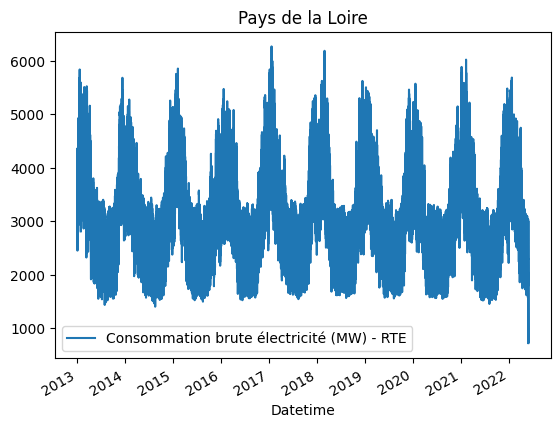

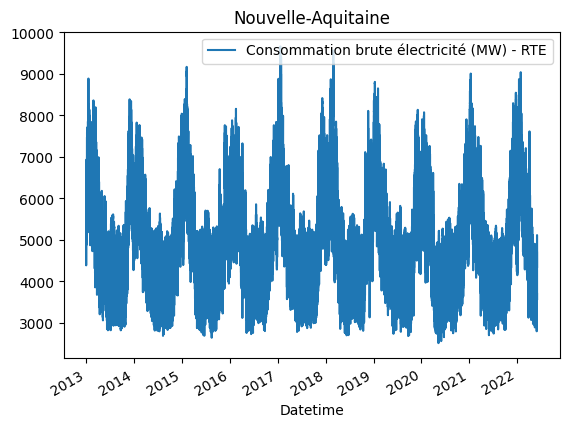

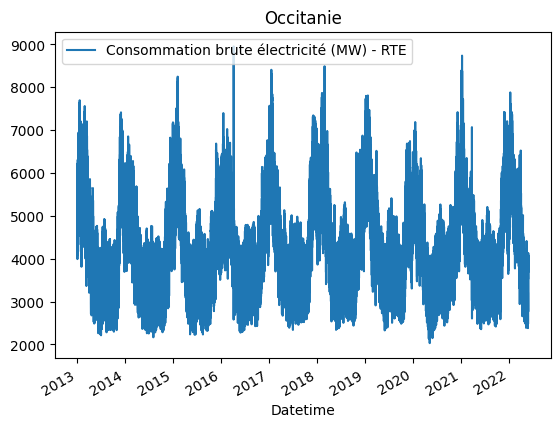

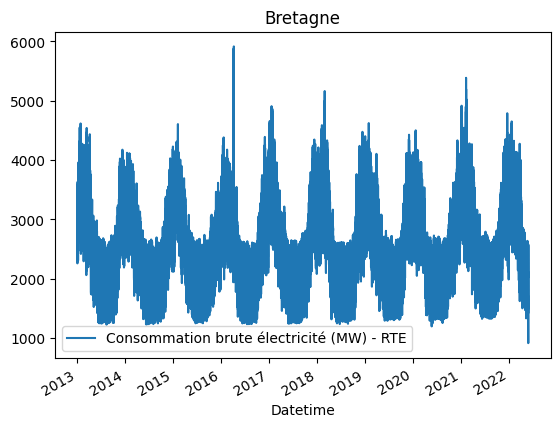

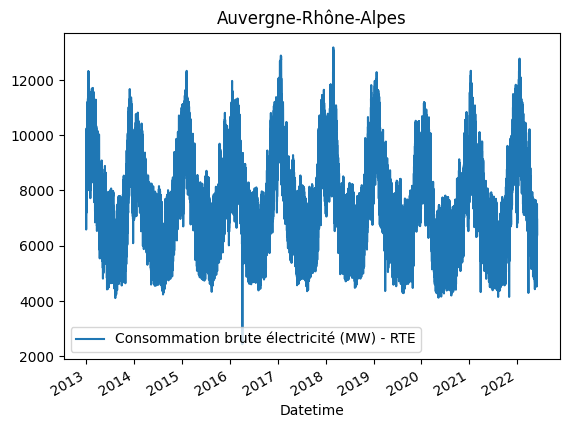

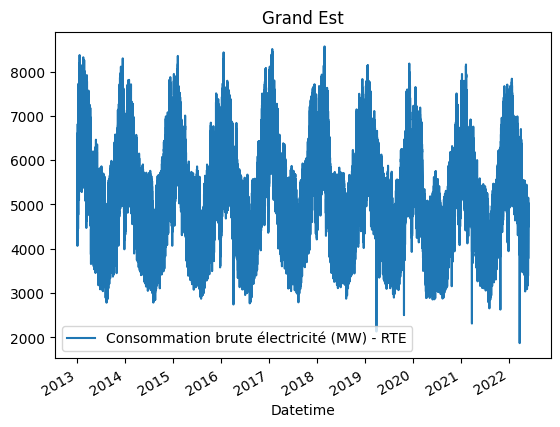

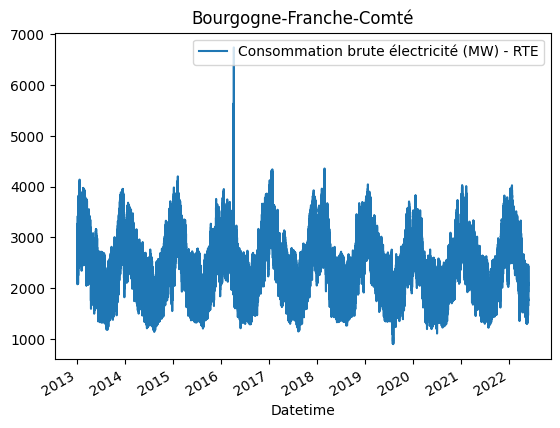

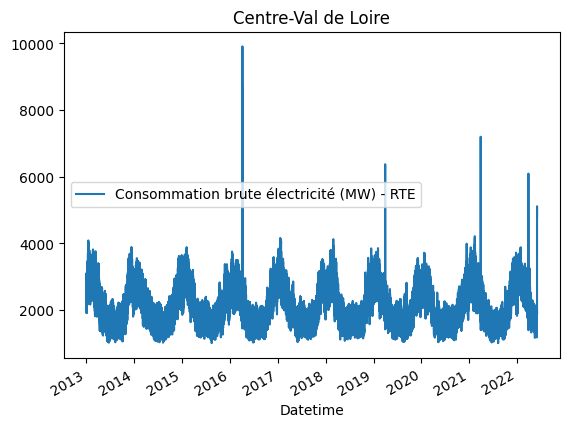

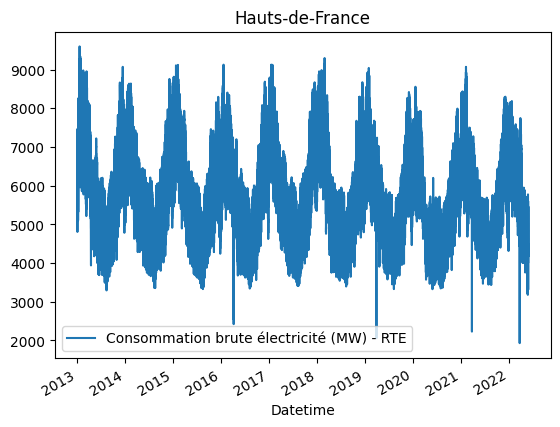

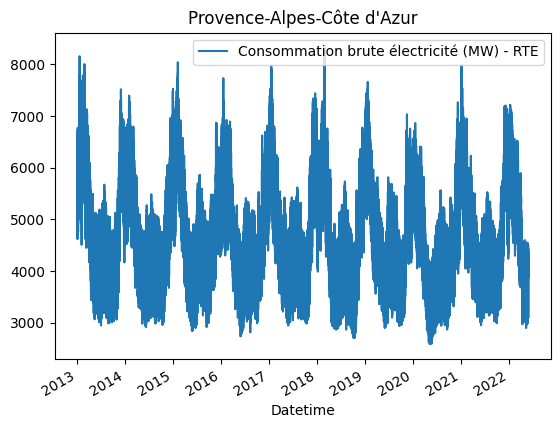

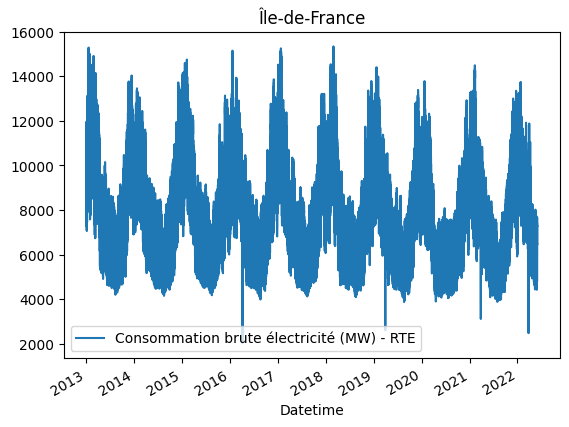

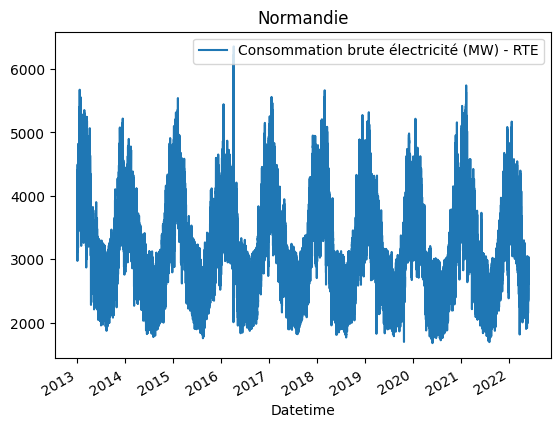

In [9]:
for region in df_energy["Région"].unique():
    df_energy[df_energy["Région"] == region].plot(x="Datetime", y="Consommation brute électricité (MW) - RTE")
    plt.title(region)

In [10]:
def categorize_cloudiness(df):
    df = df.copy()
    bins = [0, 50, 100, 150, 200, 250]
    labels = ["Very Clear", "Clear", "Partially Cloudy", "Cloudy", "Very Cloudy"]
    df["Cloudiness"] = pd.cut(df["Nebulosité totale"], bins=bins, labels=labels)
    df = pd.get_dummies(df, columns=["Cloudiness"])
    return df


def high_consumption_indicator(df, quant = 0.9):
    df = df.copy()
    # create default column with zero values
    df["high_consumption_indicator"] = 0

    # iterate over region and categorize consumption over xth-quantile as high
    for region in df["Région"].unique():
        threshold = df.loc[df["Région"] == region, "Consommation brute électricité (MW) - RTE"].quantile(q=quant)
        cond = (df["Consommation brute électricité (MW) - RTE"] >= threshold) & (df["Région"] == region)
        df.loc[cond, "high_consumption_indicator"] = 1
    
    return df

### Creating Extended Lag Features


In predictive modeling, especially in energy consumption forecasting, understanding how past consumption influences future forecasts is crucial. Lag features capture these temporal dynamics, enabling models to integrate the impact of past conditions and behaviors on current forecasts.

#### Task:
Write a Python function named `create_extended_lag_features` that generates multiple lag features for different time intervals in a DataFrame containing energy consumption data.

#### Specifics:

- Define various lag intervals (e.g., 1 day, 7 days, 1 week, 4 weeks, 1 year).
- Create lag features for each interval by shifting the 'Consommation brute électricité (MW) 


In [11]:
def create_extended_lag_features(df):
    df['Date - Heure'] = pd.to_datetime(df['Date - Heure'], utc=True)
    df = df.sort_values(by=['Région', 'Date - Heure'])

    lag_intervals = [48, 7*48, 7*4*48, 365*48]


    def create_lag_features(group):
        for lag_interval in lag_intervals:
            lag_column_name = f'Consommation brute électricité (MW) Lag_{lag_interval//48}d'
            group[lag_column_name] = group['Consommation brute électricité (MW) - RTE'].shift(lag_interval)
        return group

    return df.groupby('Région').apply(create_lag_features)

## 2. Optional : Try strandard Machine Learning models

Implement a classical machine learning model to predict the energy consumption of the next 24 hours for Ile de France.